[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

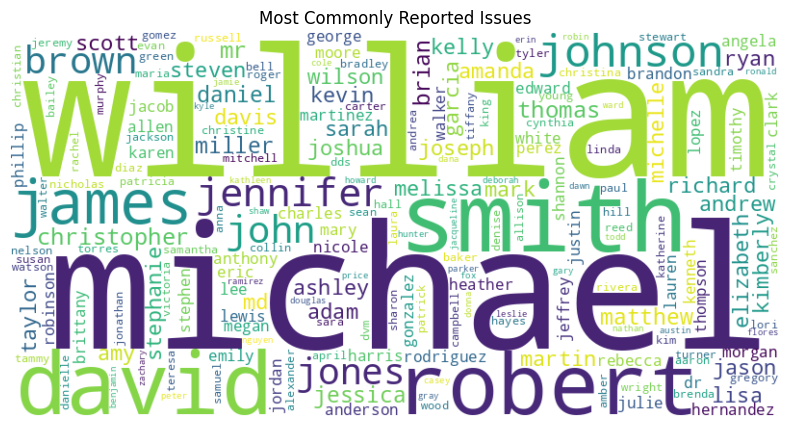


Suggested Improvements:


In [20]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Download stopwords
nltk.download("stopwords")

# Load dataset
file_path = "/content/customer_support_tickets.csv"

# Try loading with different encodings
try:
    df = pd.read_csv(file_path, encoding="utf-8")
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Display dataset structure
print(df.info())

# Detect the text column (assuming it's related to issue descriptions)
text_columns = [col for col in df.columns if df[col].dtype == "object"]
if not text_columns:
    raise ValueError("No text-based column found in the dataset.")

issue_col = text_columns[0]  # Assume the first text column is the issue description
print(f"Using '{issue_col}' as the issue description column.")

# Data Cleaning Function
def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r"[^A-Za-z0-9 ]+", "", text)  # Remove special characters
    text = " ".join([word for word in text.split() if word not in stopwords.words("english")])  # Remove stopwords
    return text

df["cleaned_text"] = df[issue_col].apply(clean_text)

# Identify Most Frequent Issues
all_words = " ".join(df["cleaned_text"])
word_freq = Counter(all_words.split())
common_issues = word_freq.most_common(10)

# Display most common issues
print("\nTop 10 Reported Issues:")
for issue, count in common_issues:
    print(f"{issue}: {count}")

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Commonly Reported Issues")
plt.show()

# Recommendations for Improvement
print("\nSuggested Improvements:")
if "login" in all_words:
    print("- Many users report login issues. Consider implementing a password reset automation.")
if "error" in all_words:
    print("- Frequent error reports suggest the need for better debugging & automated alerts.")
if "delay" in all_words or "slow" in all_words:
    print("- Users experiencing delays. Consider improving ticket response prioritization.")
